In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [ ]:
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [ ]:
mode_value = df['type'].mode()[0]  # Get the mode (most frequent value)
df['type'].fillna(mode_value, inplace=True)

In [ ]:
df = df.dropna(subset=['genre'], axis=0)

In [ ]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [ ]:
df.shape

(12232, 7)

In [ ]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

**There is an 'unknown' value in episodes, lets replace them with 0.**

In [ ]:
#REPLACE 'UNKNOWN' WITH NP.NAN
df['episodes'] = df['episodes'].replace({'Unknown' : '0'}, regex=True)

In [ ]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99', 0,
       '39', '101', '47', '50', '62', '33', '112', '23', '3', '94', '6',
       '8', '14', '7', '40', '15', '203', '77', '291', '120', '102', '96',
       '38', '79', '175', '103', '70', '153', '45', '5', '21', '63', '52',
       '28', '145', '36', '69', '60', '178', '114', '35', '61', '34',
       '109', '20', '9', '49', '366', '97', '48', '78', '358', '155',
       '104', '113', '54', '167', '161', '42', '142', '31', '373', '220',
       '46', '195', '17', '1787', '73', '147', '127', '16', '19', '98',
       '150', '76', '53', '124', '29', '115', '224', '44', '58', '93',
       '154', '92', '67', '172', '86', '30', '276', '59', '72', '330',
       '41', '105', '128', '137', '56', '55', '65', '243', '193', '18',
       '191', '180', '91', '192', '66', '182', '32', '164', '100', '296',
       '694', '95', '68', '117', '151', '130', '87', '

In [ ]:
df['name'].value_counts()

,count
name,
Shi Wan Ge Leng Xiaohua,2
Saru Kani Gassen,2
Kimi no Na wa.,1
Asa da yo! Kaishain,1
Ashita Kirarin,1
Ashita no Eleventachi,1
Ashita no Kibou: Kanashimi yo Arigatou - Takae Tsuneo Monogatari,1
Ashita Tenki ni Naare Omake,1
Asobo Toy-chan,1


**Lets check the range of rating**

In [ ]:
df['rating'].unique()

array([ 9.37      ,  9.26      ,  9.25      ,  9.17      ,  9.16      ,
        9.15      ,  9.13      ,  9.11      ,  9.1       ,  9.06      ,
        9.05      ,  9.04      ,  8.98      ,  8.93      ,  8.92      ,
        8.88      ,  8.84      ,  8.83      ,  8.82      ,  8.81      ,
        8.8       ,  8.78      ,  8.77      ,  8.76      ,  8.75      ,
        8.74      ,  8.73      ,  8.72      ,  8.71      ,  8.69      ,
        8.68      ,  8.67      ,  8.66      ,  8.65      ,  8.64      ,
        8.62      ,  8.61      ,  8.6       ,  8.59      ,  8.58      ,
        8.57      ,  8.56      ,  8.55      ,  8.54      ,  8.53      ,
        8.52      ,  8.51      ,  8.5       ,  8.49      ,  8.48      ,
        8.47      ,  8.46      ,  8.45      ,  8.44      ,  8.43      ,
        8.42      ,  8.41      ,  8.4       ,  8.39      ,  8.38      ,
        8.37      ,  8.36      ,  8.35      ,  8.34      ,  8.33      ,
        8.32      ,  8.31      ,  8.3       ,  8.29      ,  8.28

**Lets convert them into simple 1 to 10 integer range.**

In [ ]:
import numpy as np
max = df['rating'].max()
min = df['rating'].min()
def convert_ratings(ratings):
    # Convert ratings to numpy array for easy manipulation
    ratings = np.array(ratings)

    # Scale ratings to a 1-10 integer scale
    scaled_ratings = 1 + 9 * (ratings - min) / (max - min)

    # Round to the nearest integer
    integer_ratings = np.round(scaled_ratings).astype(int)

    return integer_ratings

df['rating'] = convert_ratings(df['rating'])


In [ ]:
df['rating'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 10])

# DATA VISUALIZATION

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

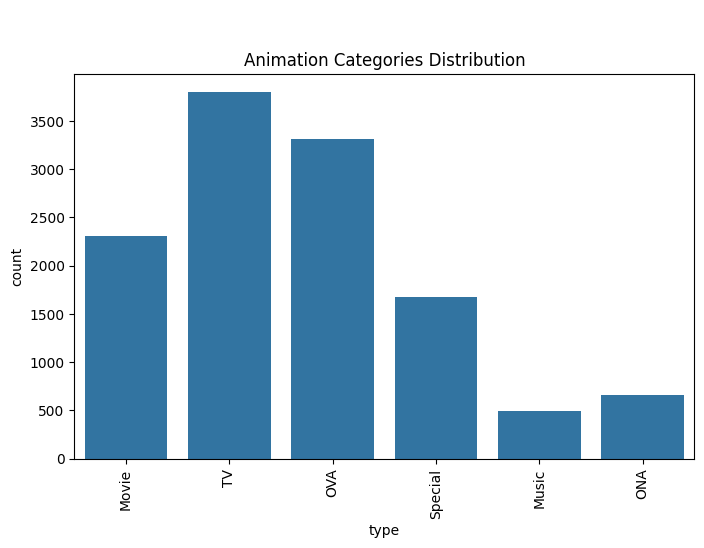

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df.type)
plt.xticks(rotation='vertical')
plt.title("\n\nAnimation Categories Distribution")
plt.show()

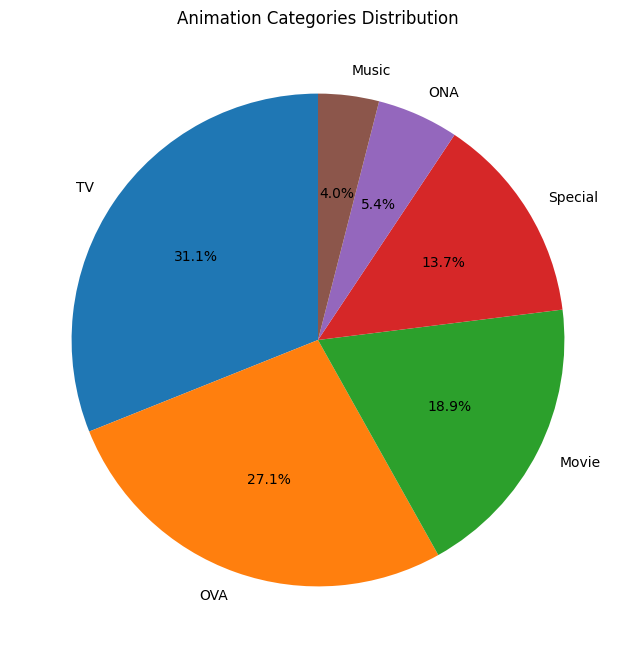

In [ ]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Animation Categories Distribution')
plt.show()


* **Approx. 3500 of animations on TV, which is 30.2% of total animations.**
* **Approx. 2200 of animations are movies, which is 19.1% of total animations.**
* **After TV animations, OVA is most common, which is 27.4% of total animations.**

**RECOMMENDATION SYSTEM**

In [ ]:
df = df.drop(columns=['members'])
df

,anime_id,name,genre,type,episodes,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9
...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4
12290,5543,Under World,Hentai,OVA,1,4
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,5


In [ ]:
df['genre'] = df['genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [ ]:
df['tags'] = df['genre']+','+ df['type']
data = df.drop(columns=['type','genre'])
data

,anime_id,name,episodes,rating,tags
0,32281,Kimi no Na wa.,1,9,"Drama, Romance, School, Supernatural,Movie"
1,5114,Fullmetal Alchemist: Brotherhood,64,9,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,51,9,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,24,9,"Sci-Fi, Thriller,TV"
4,9969,Gintama&#039;,51,9,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4,"Hentai,OVA"
12290,5543,Under World,1,4,"Hentai,OVA"
12291,5621,Violence Gekiga David no Hoshi,4,4,"Hentai,OVA"
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,5,"Hentai,OVA"


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [ ]:
vector = cv.fit_transform(data['tags']).toarray()
vector.shape

(12232, 51)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.15811388, 0.        , ..., 0.        , 0.        ,
        0.31622777],
       [0.15811388, 1.        , 0.35355339, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35355339, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.31622777, 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [ ]:
def recommendation_of_anime(name):
    index = data[data['name'] == name].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(data.iloc[i[0]]['name'])

In [ ]:
data[data['name'] == 'Under World'].index[0]

12290

**NOW ASK FOR RECOMMENDATIONS**

In [ ]:
recommendation_of_anime('Steins;Gate')

Steins;Gate 0
Fireball Charming
Hanoka
Hoshi no Ko Poron
RoboDz


**1. Can you explain the difference between user-based and item-based collaborative filtering?**

User-based Filtering:
User-based filtering, also known as user-user collaborative filtering, recommends items to a target user based on the preferences and similarities of other users. The idea is that users who have similar preferences in the past are likely to have similar preferences in the future. This approach calculates the similarity between users based on their interactions with items (ratings, purchases, etc.) and recommends items liked by similar users to the target user.

Item-based Filtering:
Item-based filtering, also known as item-item collaborative filtering, recommends items to a user based on the similarities between items themselves. The system identifies similar items based on the historical ratings or interactions of users with those items. When a user expresses interest in an item, the system recommends similar items that other users have liked in the past.

**2. What is collaborative filtering, and how does it work?**



In Collaborative Filtering, we tend to find similar users and recommend what similar users like. In this type of recommendation system, we don’t use the features of the item to recommend it, rather we classify the users into clusters of similar types and recommend each user according to the preference of its cluster.

There are basically four types of algorithms o say techniques to build Collaborative filtering recommender systems:

Memory-Based
Model-Based
Hybrid
Deep Learning
